__Name: Subhiksha Rani ; USC ID: 9907399097__

__1. The LASSO and Boosting for Regression__

__(a) Importing the Dataset and using first 1495 rows of data as training set & rest as test set. (b) Removing non-predictive features & dealing with missing values using data imputation technique.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from heapq import nlargest
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import arff
from scipy.stats import variation 

In [2]:
data = pd.read_csv('communities.data', na_values='?',names = ["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"])

In [3]:
#removing non-predictive features
data = data.drop(["state","county","community","communityname","fold"],axis=1)

In [4]:
#Performing data impute on the dataset & replacing the NaN values with the mean for each column.
data.fillna(data.mean(), inplace=True)

In [5]:
#dividing the dataset into training & test sets
training_set = data.head(1495)
test_set = data.tail(499)

<br>__(c)Plotting a correlation matrix for the features in the data set.__

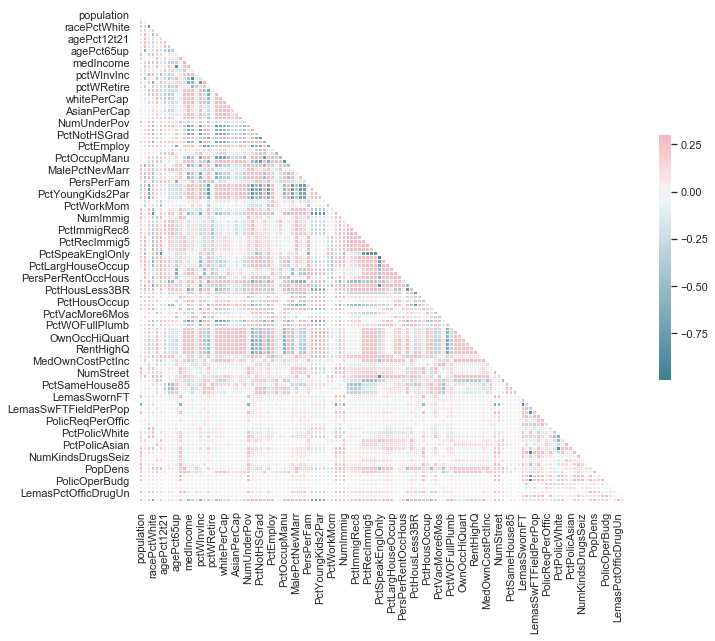

In [6]:
#plotting correlation matrix for features in training set
sns.set(style="white")
corr = training_set.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask,  vmax=.3, center=0, square=True, linewidths=.2, cbar_kws={"shrink": .5})

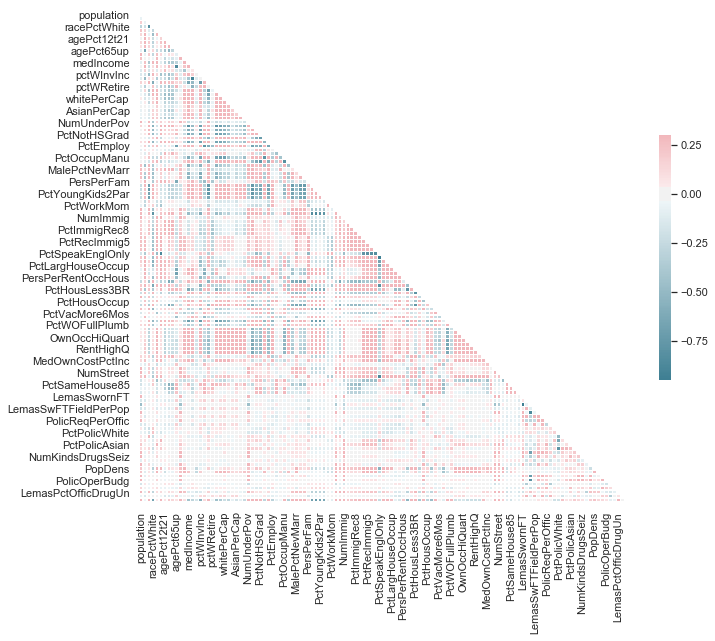

In [7]:
#plotting correlation matrix for features in test set
sns.set(style="white")
corr = test_set.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask,  vmax=.3, center=0, square=True, linewidths=.2, cbar_kws={"shrink": .5})

<br>__(d) Calculating the Coefficient of Variation CV for each feature.__

In [8]:
Training_CV = pd.DataFrame(columns=training_set.columns)
var_train = []
training_dict = {}
for i in range(0,123):
    cv=variation(training_set.iloc[:,i], axis=0)
    var_train = np.append(var_train,cv)
    training_dict.update({training_set.columns[i]:cv})
Training_CV =  Training_CV.append(pd.Series(var_train,index=training_set.columns),ignore_index=True)    

In [9]:
print("Coefficient of Variation CV for each feature in Training Set: ")
Training_CV

Coefficient of Variation CV for each feature in Training Set: 


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,2.240355,0.355681,1.428407,0.330102,1.358645,1.611552,0.36896,0.291217,0.500143,0.412638,...,1.644857,0.86421,1.396642,0.539642,0.774085,0.117949,0.370877,2.552092,0.319928,0.987578


In [10]:
Test_CV = pd.DataFrame(columns=test_set.columns)
var_test = []
test_dict = {}
for i in range(0,123):
    cv = test_set.iloc[:,i].var()/test_set.iloc[:,i].mean()
    var_test = np.append(var_test,cv)
    test_dict.update({test_set.columns[i]:cv})
Test_CV =  Test_CV.append(pd.Series(var_test,index=test_set.columns),ignore_index=True)    

In [11]:
print("Coefficient of Variation CV for each feature in Test Set: ")
Test_CV

Coefficient of Variation CV for each feature in Test Set: 


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.24106,0.056078,0.329385,0.069985,0.284373,0.371586,0.054464,0.041658,0.078091,0.084183,...,0.212176,0.184859,0.330886,0.037861,0.023976,0.012501,0.055978,0.632665,0.028958,0.207087


__(e) Finding 11 items with highest CV in training set.__

In [12]:
training_top11 = {key: value for key, value in training_dict.items() if value in nlargest(11, training_dict.values())}
print("11 items with highest CV in Training Set: ",training_top11)

11 items with highest CV in Training Set:  {'population': 2.240354965879167, 'racePctHisp': 1.6115517541662485, 'numbUrban': 2.037779618174568, 'NumUnderPov': 2.341659559375309, 'NumIlleg': 3.0579411110718357, 'NumImmig': 2.925656274779147, 'HousVacant': 1.9678085888226329, 'NumInShelters': 3.4697910919591677, 'NumStreet': 4.291486989120396, 'LandArea': 1.644857464527919, 'LemasPctOfficDrugUn': 2.552091540968875}


__Plotting scatter plots for the above values__

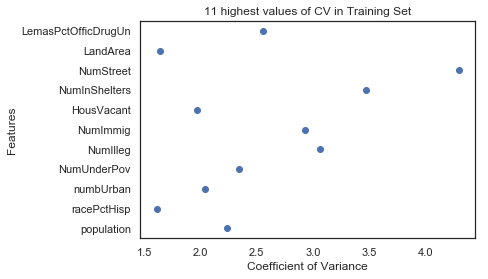

In [13]:
xval = []
yval = []
for key,value in training_top11.items(): 
   xval = np.append(xval,value)
   yval = np.append(yval,key)
plt.scatter(xval,yval)
plt.title('11 highest values of CV in Training Set')
plt.xlabel('Coefficient of Variance')
plt.ylabel('Features')
plt.show()

__Scatter plots for all the values of the above selected features.__

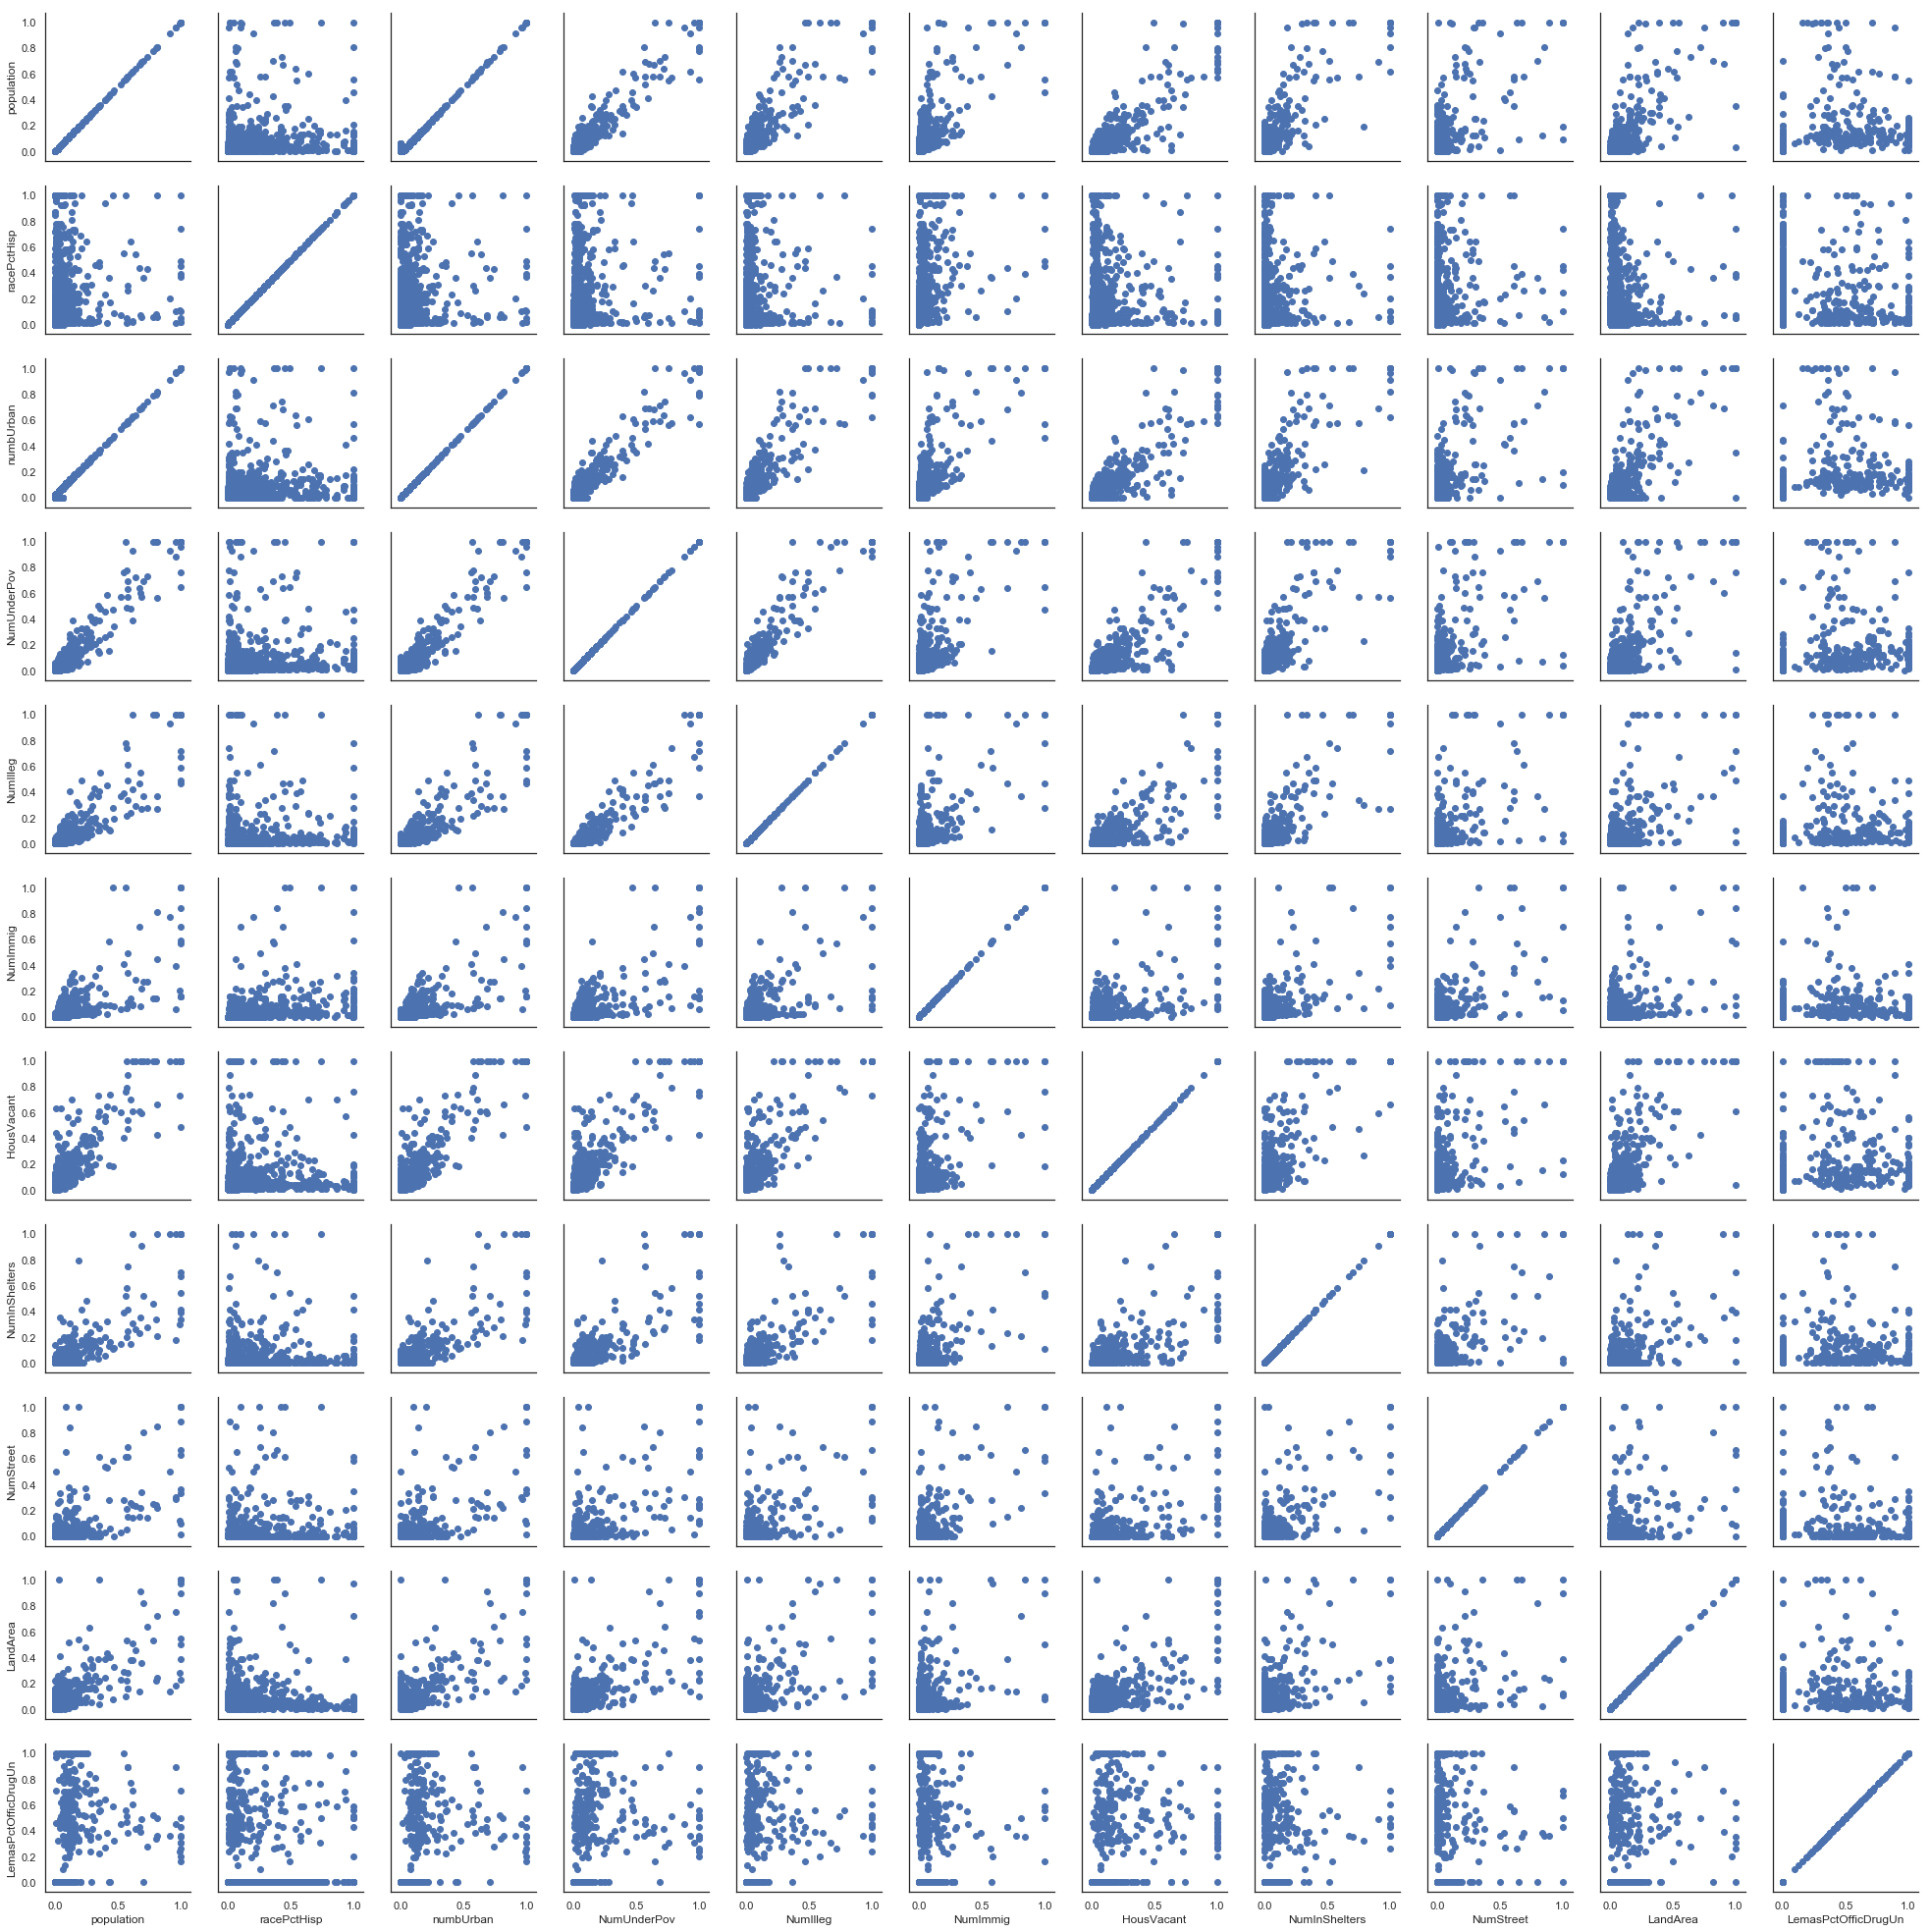

In [14]:
var1 = sns.PairGrid(training_set[yval])
var1 = var1.map(plt.scatter)

__Plotting Boxplots for 11 items with highest CV in training set.__

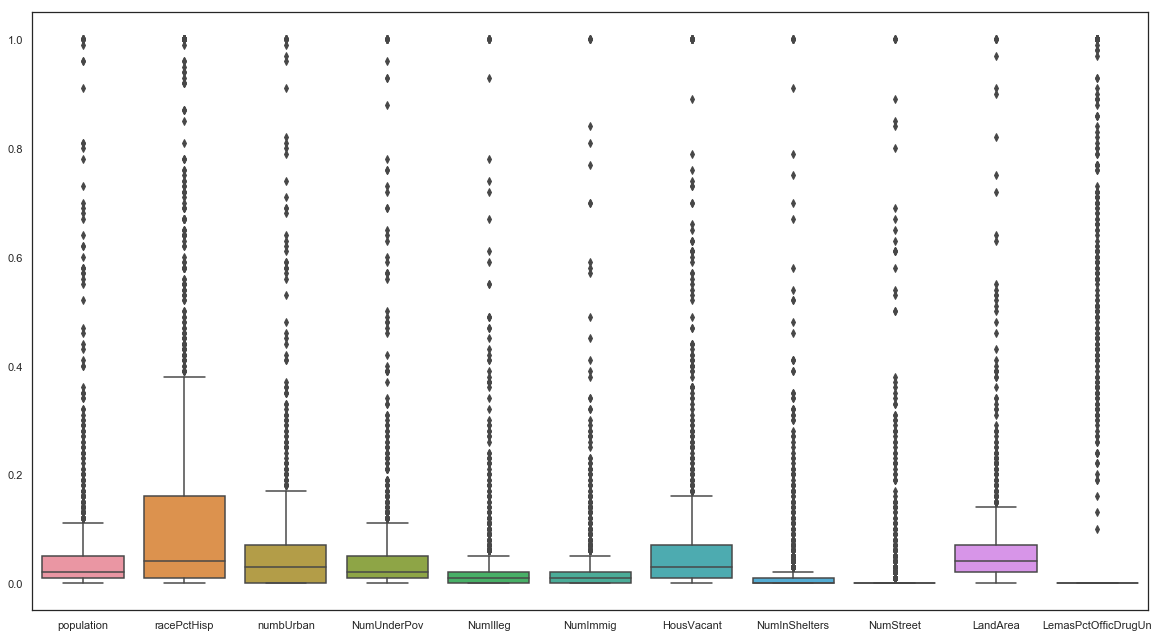

In [15]:
fig = plt.figure(figsize=(20, 11))
ax = fig.add_subplot(111)
x_data = training_set[yval]
sns.boxplot(data = x_data)
ax.set_xticklabels(yval)
plt.show()

<br>__Finding 11 items with highest CV in test set.__

In [16]:
test_top11 = {key: value for key, value in test_dict.items() if value in nlargest(11, test_dict.values())}
print("11 items with highest CV in Test Set: ",test_top11)

11 items with highest CV in Test Set:  {'racepctblack': 0.3293848884116853, 'racePctHisp': 0.3715859691961144, 'PctRecentImmig': 0.30419962604981443, 'PctRecImmig5': 0.3090746231725096, 'PctRecImmig8': 0.31089242049302973, 'PctRecImmig10': 0.30931650812816325, 'PctNotSpeakEnglWell': 0.31591256159729636, 'NumInShelters': 0.36154517030058014, 'NumStreet': 0.5024230012273304, 'PctUsePubTrans': 0.33088616430457335, 'LemasPctOfficDrugUn': 0.6326651872840013}


__Plotting scatter plots for the above values__

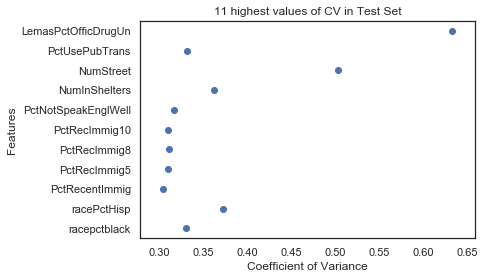

In [17]:
xval = []
yval = []
for key,value in test_top11.items(): 
   xval = np.append(xval,value)
   yval = np.append(yval,key)
plt.scatter(xval,yval)
plt.title('11 highest values of CV in Test Set')
plt.xlabel('Coefficient of Variance')
plt.ylabel('Features')
plt.show()

__Pairwise Scatter plots for all the values of the above selected features.__

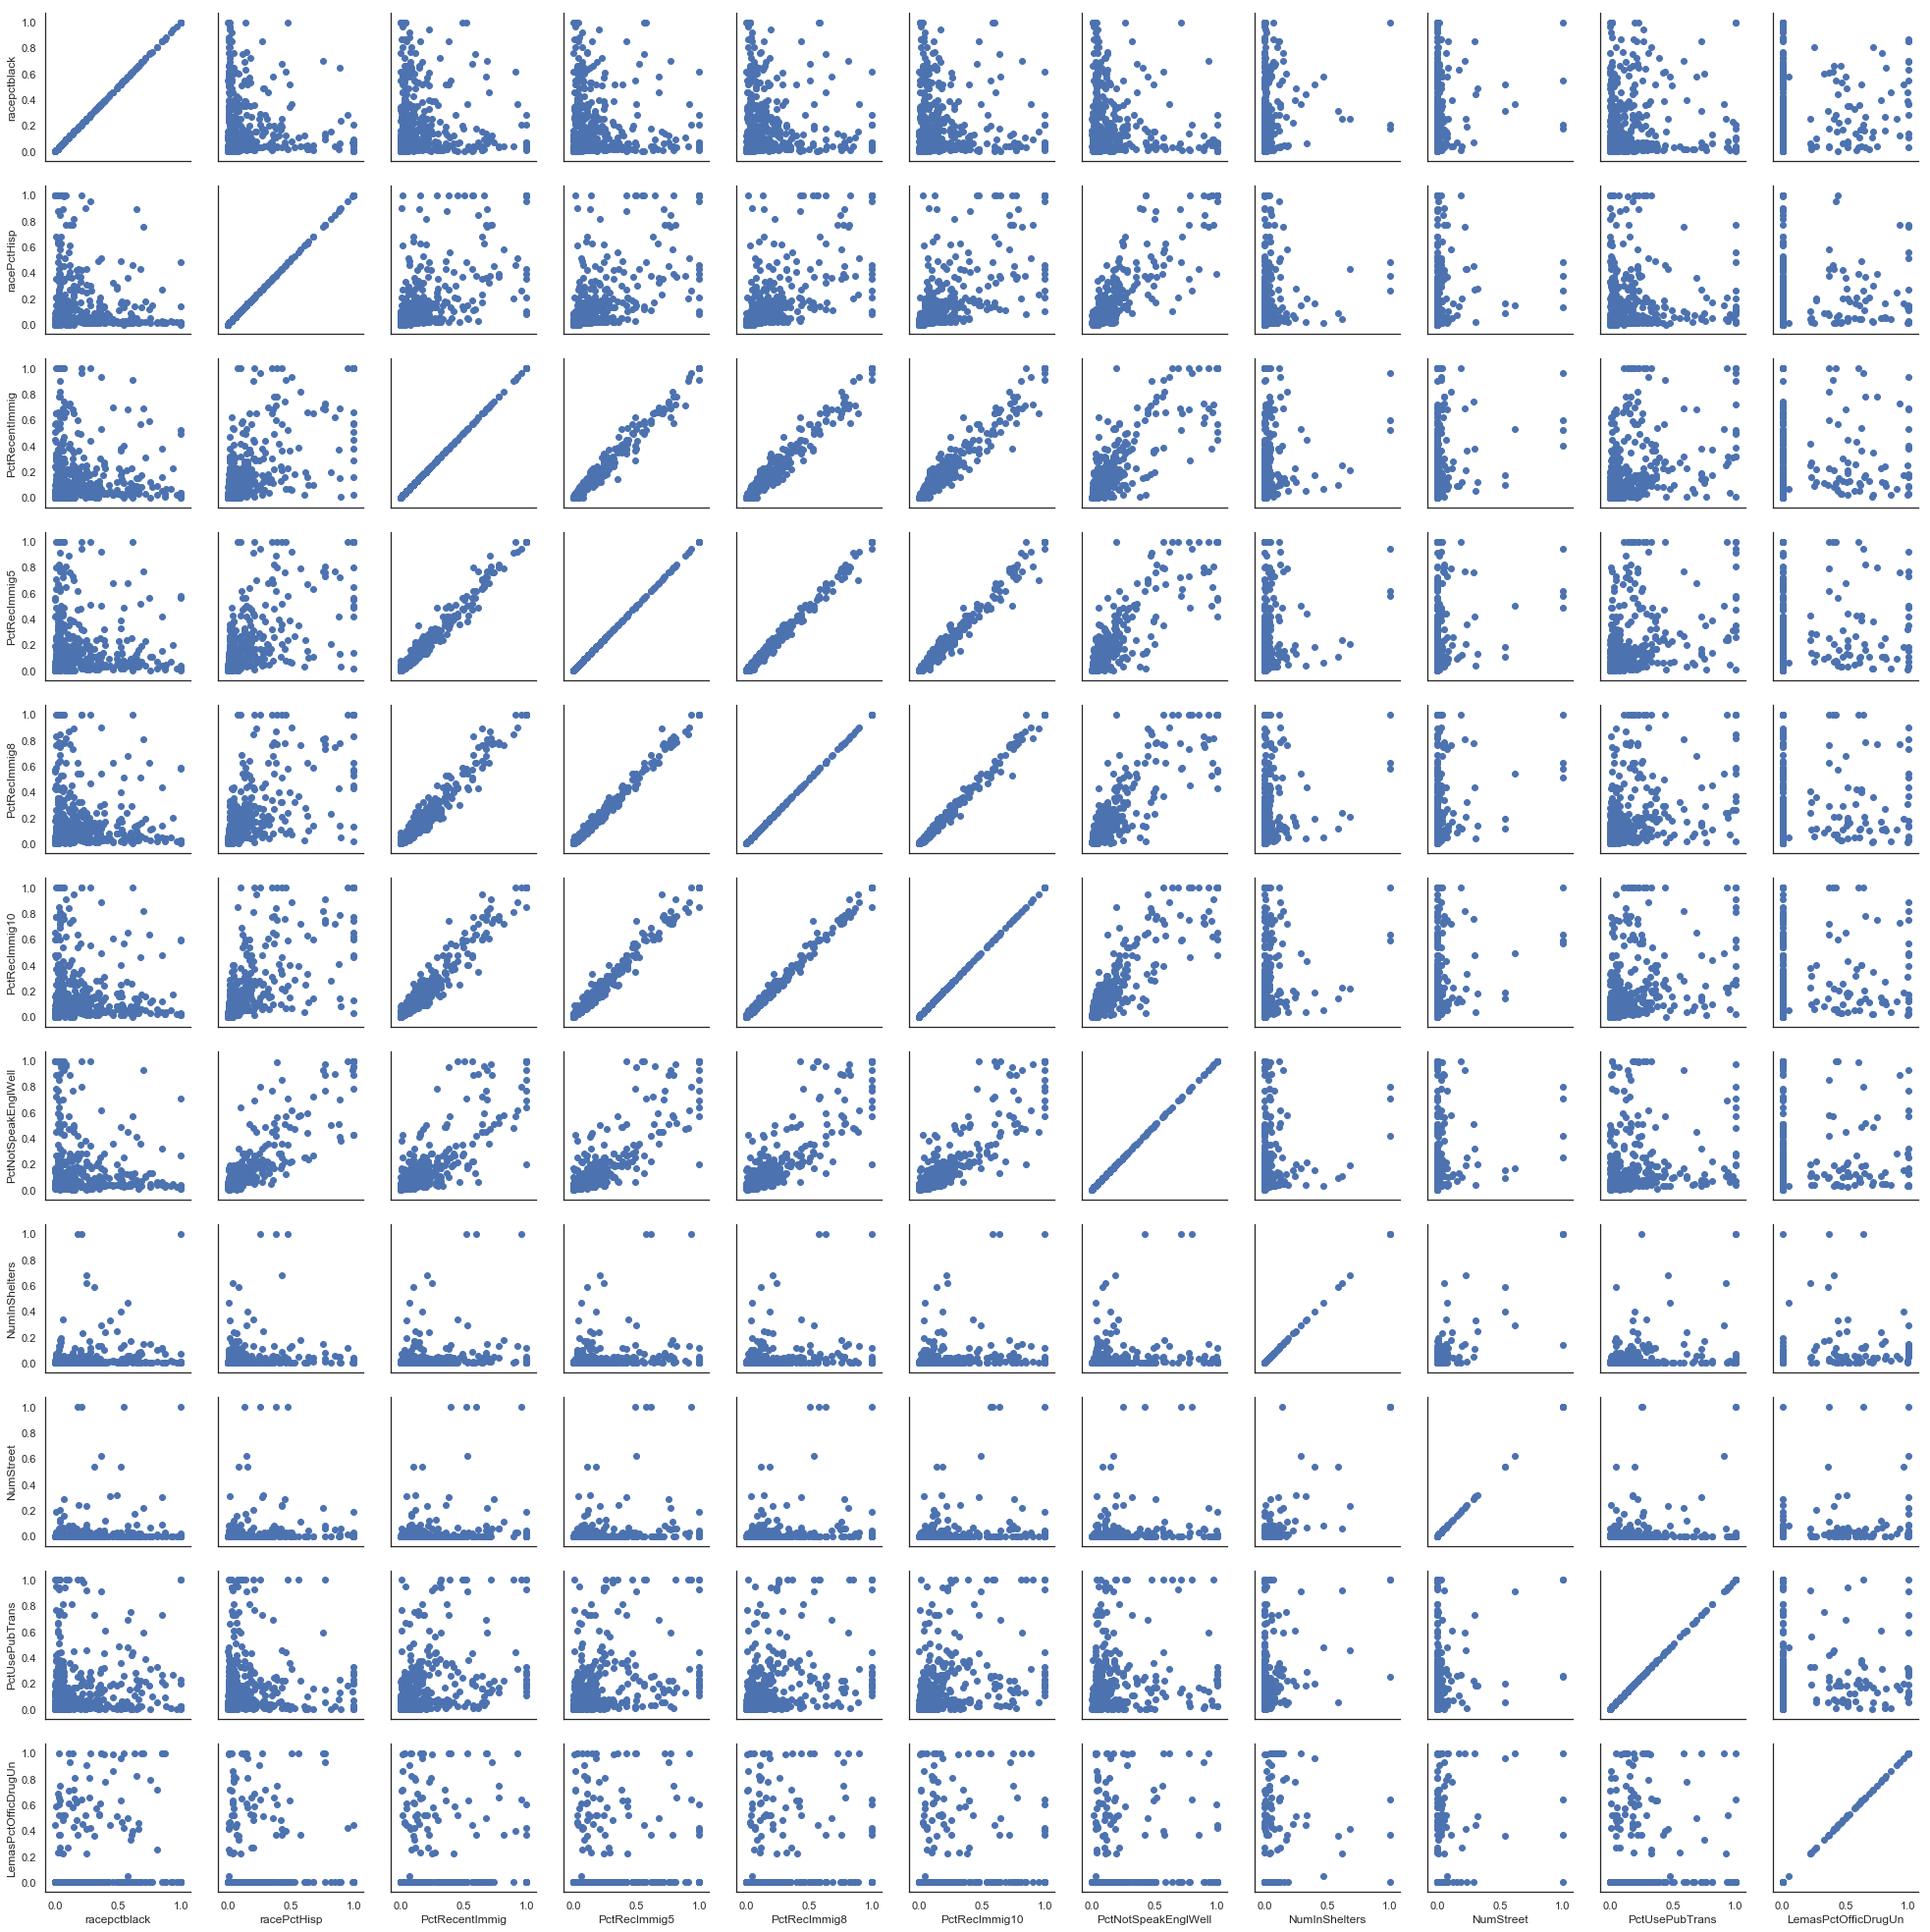

In [18]:
var2 = sns.PairGrid(test_set[yval])
var2 = var2.map(plt.scatter)

__Plotting Boxplots for 11 items with highest CV in test set.__

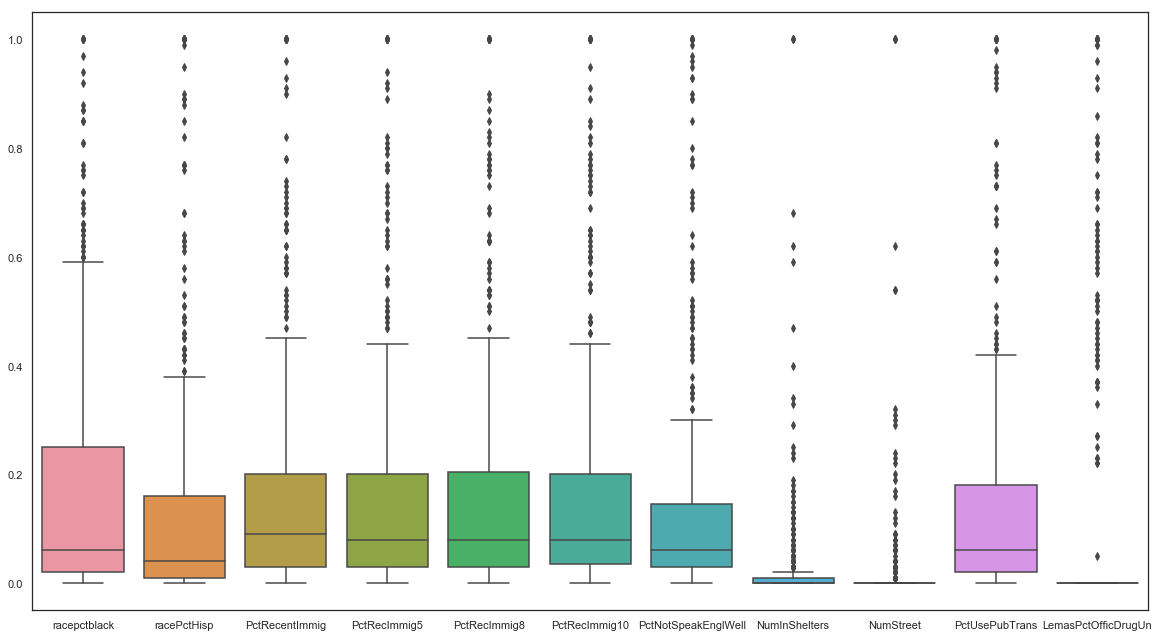

In [19]:
fig = plt.figure(figsize=(20, 11))
ax = fig.add_subplot(111)
x_data = test_set[yval]
sns.boxplot(data = x_data)
ax.set_xticklabels(yval)
plt.show()

<br><br>__(f) Fit a linear model using least squares to the training set and report the test error.__

In [20]:
X_train = training_set.iloc[:,0:122]
y_train = training_set.iloc[:,-1]
X_test = test_set.iloc[:,0:122]
y_test = test_set.iloc[:,-1]

In [21]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test,y_pred))

Mean squared error:  0.7897255274361263


<br>__(g) Fit a ridge regression model on the training set, with lambda chosen by cross-validation. Report the test error obtained.__

In [22]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True).fit(X_train, y_train)
print("Lambda chosen by cross validation:", ridgecv.alpha_)

Lambda chosen by cross validation: 0.0466301673441609


In [23]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True).fit(X_train, y_train)
y_pred1 = ridge.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, y_pred1))

Mean squared error:  0.017562554133114135


<br>__(h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model.__

In [24]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = False).fit(X_train, y_train)
lasso = Lasso(max_iter = 10000, normalize = False)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred2 = lasso.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, y_pred2))

Mean squared error:  0.017774613570741355


In [25]:
print("List of variables selected by the model:")
lasso.coef_

List of variables selected by the model:


array([-0.        ,  0.        ,  0.27249895, -0.        , -0.01665789,
        0.        ,  0.07109539, -0.27784678,  0.        ,  0.0011751 ,
       -0.        ,  0.04073145,  0.        , -0.08891917,  0.02771806,
       -0.10354325,  0.05391932,  0.04011279, -0.10917987,  0.        ,
       -0.        , -0.06268167, -0.0217659 , -0.03149086,  0.02913329,
        0.02311615,  0.02483343, -0.        , -0.14530918, -0.01971014,
        0.        ,  0.00743498, -0.        ,  0.14574506, -0.01741799,
        0.        ,  0.01310179,  0.        ,  0.12481517,  0.14171105,
       -0.08644452, -0.        ,  0.        , -0.        , -0.19722105,
       -0.03685726, -0.0107591 ,  0.        , -0.13195846, -0.06160317,
        0.09706191, -0.0750557 , -0.        , -0.        , -0.        ,
       -0.00535548, -0.        ,  0.        ,  0.        ,  0.03847502,
        0.        , -0.07598984, -0.        , -0.07663781,  0.05692306,
       -0.        , -0.        , -0.06082072,  0.22506971,  0.06

<br>__Repeat the above with standardized features.__

In [26]:
lassocv1 = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = False).fit(X_train, y_train)
lasso1 = Lasso(max_iter = 10000, normalize = True)
lasso1.set_params(alpha=lassocv1.alpha_)
lasso1.fit(X_train, y_train)
y_pred2 = lasso1.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, y_pred2))

Mean squared error:  0.01743236193299663


In [27]:
print("List of variables selected by the model:")
lasso1.coef_

List of variables selected by the model:


array([ 0.00000000e+00, -0.00000000e+00,  2.01426606e-01, -1.65122575e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -6.21841232e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.15010662e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.36885581e-02,
        0.00000000e+00,  4.51117999e-03, -3.05682124e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.26998799e-06,
        1.01466223e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.18132334e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.49089093e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.39776748e-02,  0.00000000e+00,  1.51575917e-01, -0.00000000e+00,
       -0.00000000e+00, -

__Comparing the test error obtained for standardized features & without standardization, we can see that the error is reduced a little for standardized features.__

<br>__(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.__

In [28]:
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
n = len(X_reduced_train)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
regr = LinearRegression()
min_score = 1
m = 0
mse = []
for i in np.arange(1, 123):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score<min_score:
        min_score = score
        m = i
print("Min Score: ", min_score, " M value: ",m)        

Min Score:  0.0194459259850635  M value:  96


In [29]:
X_reduced_test = pca.transform(scale(X_test))[:,:97]
regr = LinearRegression()
regr.fit(X_reduced_train[:,:97], y_train)
pred = regr.predict(X_reduced_test)
print("Mean squared error: ",mean_squared_error(y_test, pred))

Mean squared error:  0.018819644010020897


<br>__(j) L1-penalized gradient boosting tree.__

In [30]:
#using GridSearchCV to find alpha value
params = {'reg_alpha':[2, 1.5, 1.25, 1, 0, 0.01, 0.05]}
model = xgb.XGBRegressor()
gs = GridSearchCV(model, param_grid=params, cv=5)
gs.fit(X_train,y_train)
print("Best alpha value: ", gs.best_params_)

Best alpha value:  {'reg_alpha': 1}


In [31]:
#training a L1-penalized XGBoost model using the alpha value obtained above.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 1, n_estimators = 10)
xg_reg.fit(X_train,y_train)
y_preds = xg_reg.predict(X_test)
print("Test Error: ",mean_squared_error(y_test, y_preds))

Test Error:  0.030402779110923702


<br><br>__2. Tree-Based Methods__

__(a) Download the APS Failure data__

In [32]:
training_data_NA = pd.read_csv("aps_failure_training_set.csv", skiprows=20, na_values='na')
test_data_NA = pd.read_csv("aps_failure_test_set.csv", skiprows=20, na_values='na')
combined_data = pd.concat([training_data_NA,test_data_NA])

<br>__(b) Data Preparation__

__(i) Mean Imputation__

In [33]:
combined_data.fillna(combined_data.mean(), inplace=True)

In [34]:
training_data = combined_data.head(60000)
test_data =  combined_data.tail(16000)

<br>__(ii) Calculating the Coefficient of Variation CV for each feature.__

In [35]:
col_list = training_data.columns.tolist()
train_CV = pd.DataFrame(columns=col_list[1:171])
train_var = []
train_dict = {}
for i in range(0,170):
    cv=variation(training_data.iloc[:,i+1], axis=0)
    train_var = np.append(train_var,cv)
    train_dict.update({training_data.columns[i+1]:cv})
train_CV =  train_CV.append(pd.Series(train_var,index=col_list[1:171]),ignore_index=True)    

In [36]:
print("Coefficient of Variation CV for each feature in Training Set: ")
train_CV

Coefficient of Variation CV for each feature in Training Set: 


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,2.450917,2.297616,2.169604,193.922717,23.202393,18.670817,91.976214,34.763409,17.344407,8.544525,...,2.579033,2.55869,2.606059,2.829163,3.191586,4.962235,3.22168,5.626661,47.252018,40.498585


In [37]:
col_list = test_data.columns.tolist()
test_CV = pd.DataFrame(columns=col_list[1:171])
test_var = []
test_dict = {}
for i in range(0,170):
    cv=variation(test_data.iloc[:,i+1], axis=0)
    test_var = np.append(test_var,cv)
    test_dict.update({test_data.columns[i+1]:cv})
test_CV =  test_CV.append(pd.Series(test_var,index=col_list[1:171]),ignore_index=True)    

In [38]:
print("Coefficient of Variation CV for each feature in Test Set: ")
test_CV

Coefficient of Variation CV for each feature in Test Set: 


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,7.405023,1.676951,2.160302,1.717723,17.946662,16.003112,52.679048,43.195742,17.057382,9.072105,...,2.684583,2.620214,2.687079,2.943193,3.351882,4.594078,3.699644,6.189823,49.948225,57.928306


<br>__(iii) Plotting a correlation matrix for the features in the data set.__

Correlation matrix for features in training set: 


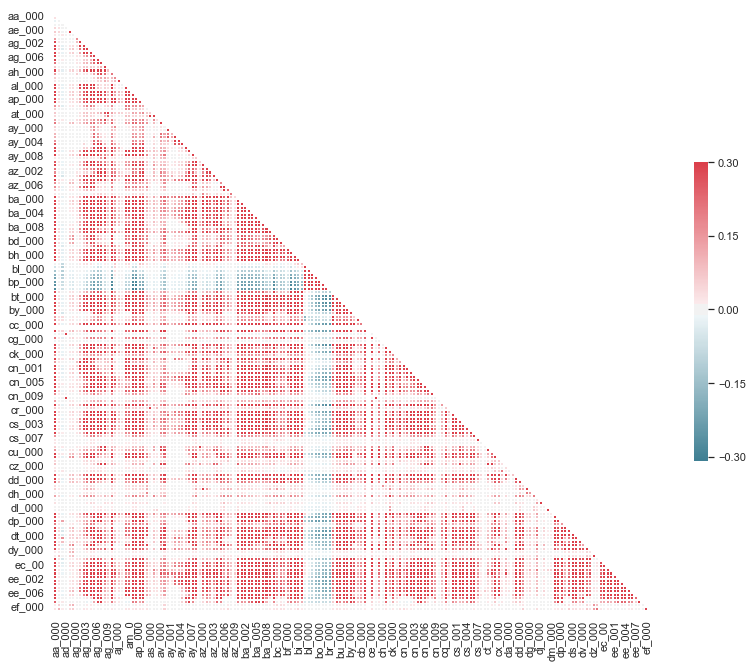

In [39]:
#plotting correlation matrix for features in training set
print("Correlation matrix for features in training set: ")
sns.set(style="white")
corr = training_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation matrix for features in test set: 


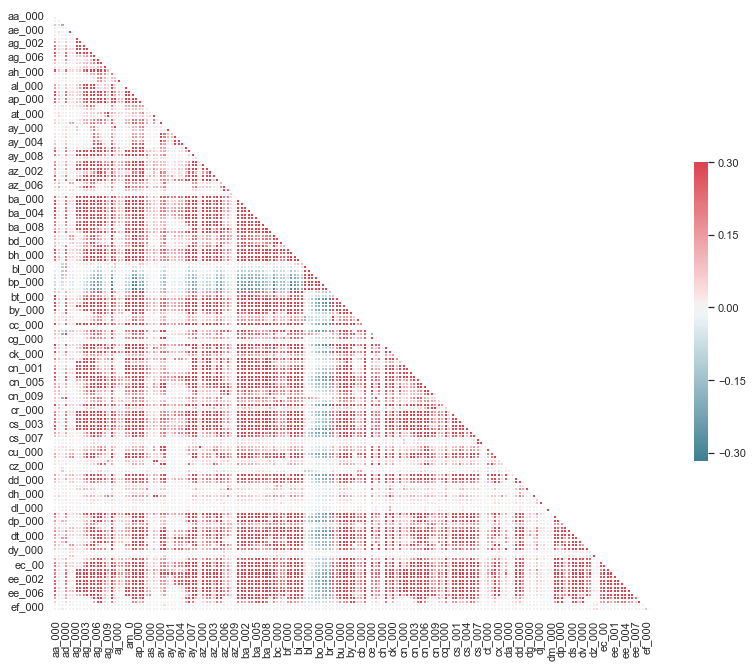

In [40]:
#plotting correlation matrix for features in test set
print("Correlation matrix for features in test set: ")
sns.set(style="white")
corr = test_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<br>__(iv) Finding 13 items with highest CV in training set.__

In [41]:
training_top13 = {key: value for key, value in train_dict.items() if value in nlargest(13, train_dict.values())}
print("13 items with highest CV in Training Set: ",training_top13)

13 items with highest CV in Training Set:  {'ad_000': 193.92271732031412, 'ag_000': 91.97621400530639, 'ak_000': 74.58496957946791, 'as_000': 85.56270754186676, 'au_000': 67.94574598682685, 'ay_009': 83.78891005078252, 'az_009': 77.05880828113166, 'cf_000': 194.35164174549917, 'ch_000': 57.88579458513687, 'co_000': 194.03753604946613, 'cs_009': 234.45143434141406, 'dh_000': 115.647498393571, 'dj_000': 111.14757254382367}


__Plotting scatter plots for the above values__

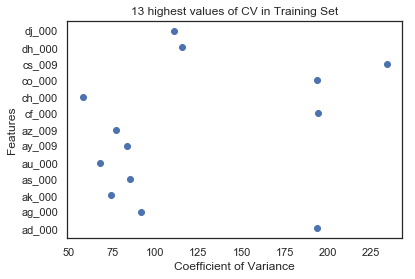

In [42]:
xval = []
yval = []
for key,value in training_top13.items(): 
   xval = np.append(xval,value)
   yval = np.append(yval,key)
plt.scatter(xval,yval)
plt.title('13 highest values of CV in Training Set')
plt.xlabel('Coefficient of Variance')
plt.ylabel('Features')
plt.show()

<br>__Pairwise Scatter plots for all the values of the above selected features.__

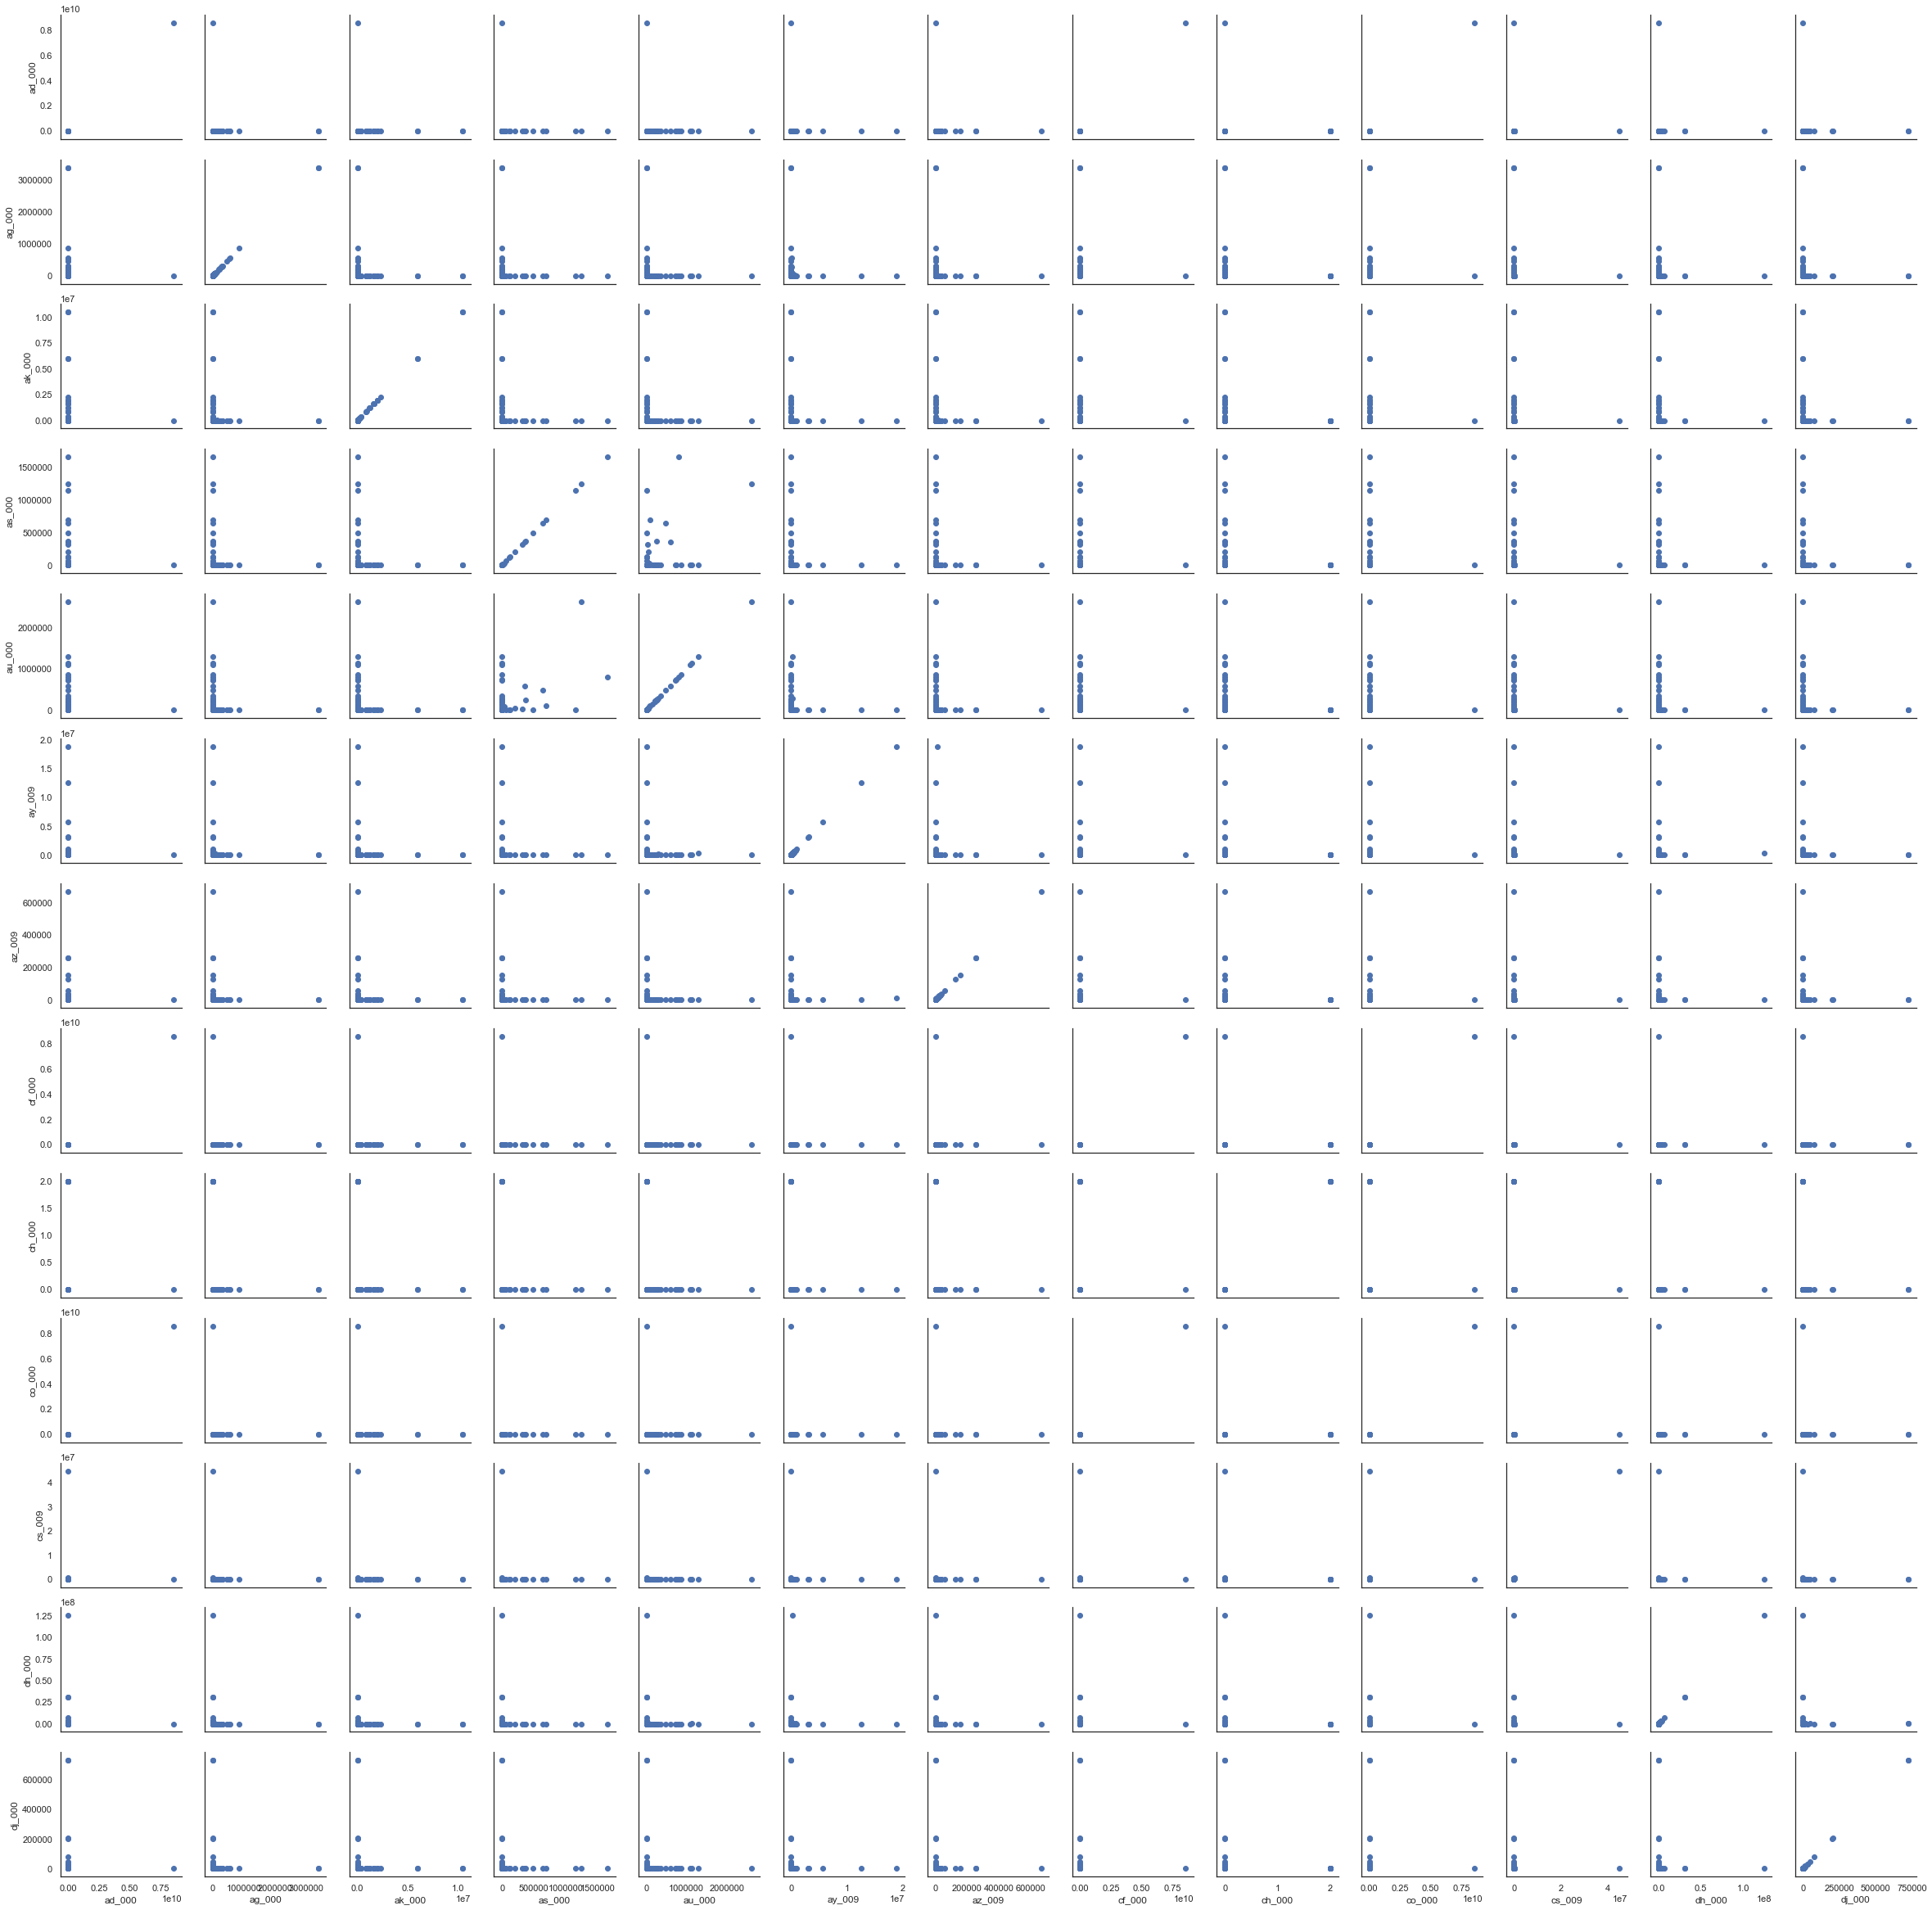

In [43]:
var3 = sns.PairGrid(training_data[yval])
var3 = var3.map(plt.scatter)

<br>__Plotting Boxplots for 13 items with highest CV in training set.__

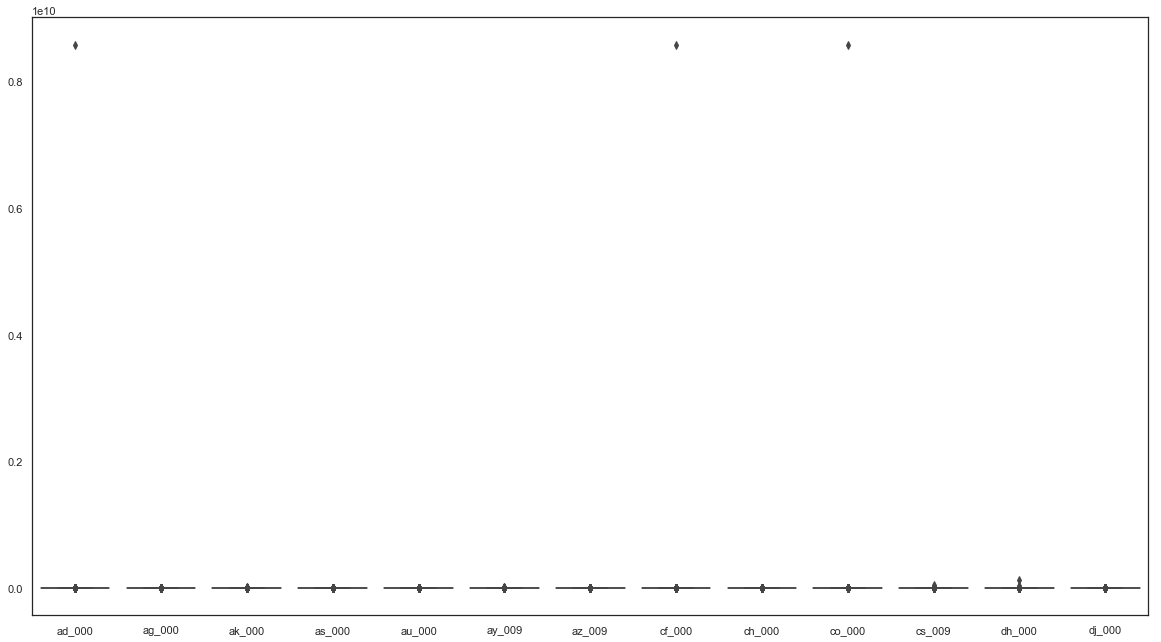

In [44]:
fig = plt.figure(figsize=(20, 11))
ax = fig.add_subplot(111)
x_data = training_data[yval]
sns.boxplot(data = x_data)
ax.set_xticklabels(yval)
plt.show()

<br>__Finding 13 items with highest CV in test set.__

In [45]:
test_top13 = {key: value for key, value in test_dict.items() if value in nlargest(13, test_dict.values())}
print("13 items with highest CV in Test Set: ",test_top13)

13 items with highest CV in Test Set:  {'ag_000': 52.679048304298966, 'ak_000': 93.4122359471849, 'as_000': 82.9064319681767, 'au_000': 84.93287614445322, 'az_009': 59.09817485274263, 'ch_000': 56.091469599127024, 'cs_008': 62.77987050938018, 'cs_009': 125.35516222509425, 'df_000': 76.39997383607387, 'dk_000': 45.992092651265814, 'dz_000': 48.91520234442738, 'ef_000': 49.94822486440893, 'eg_000': 57.92830589349868}


__Plotting scatter plots for the above values__

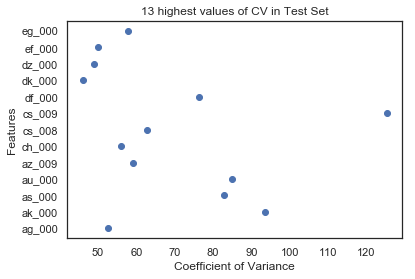

In [46]:
xval = []
yval = []
for key,value in test_top13.items(): 
   xval = np.append(xval,value)
   yval = np.append(yval,key)
plt.scatter(xval,yval)
plt.title('13 highest values of CV in Test Set')
plt.xlabel('Coefficient of Variance')
plt.ylabel('Features')
plt.show()

<br>__Pairwise Scatter plots for all the values of the above selected features.__

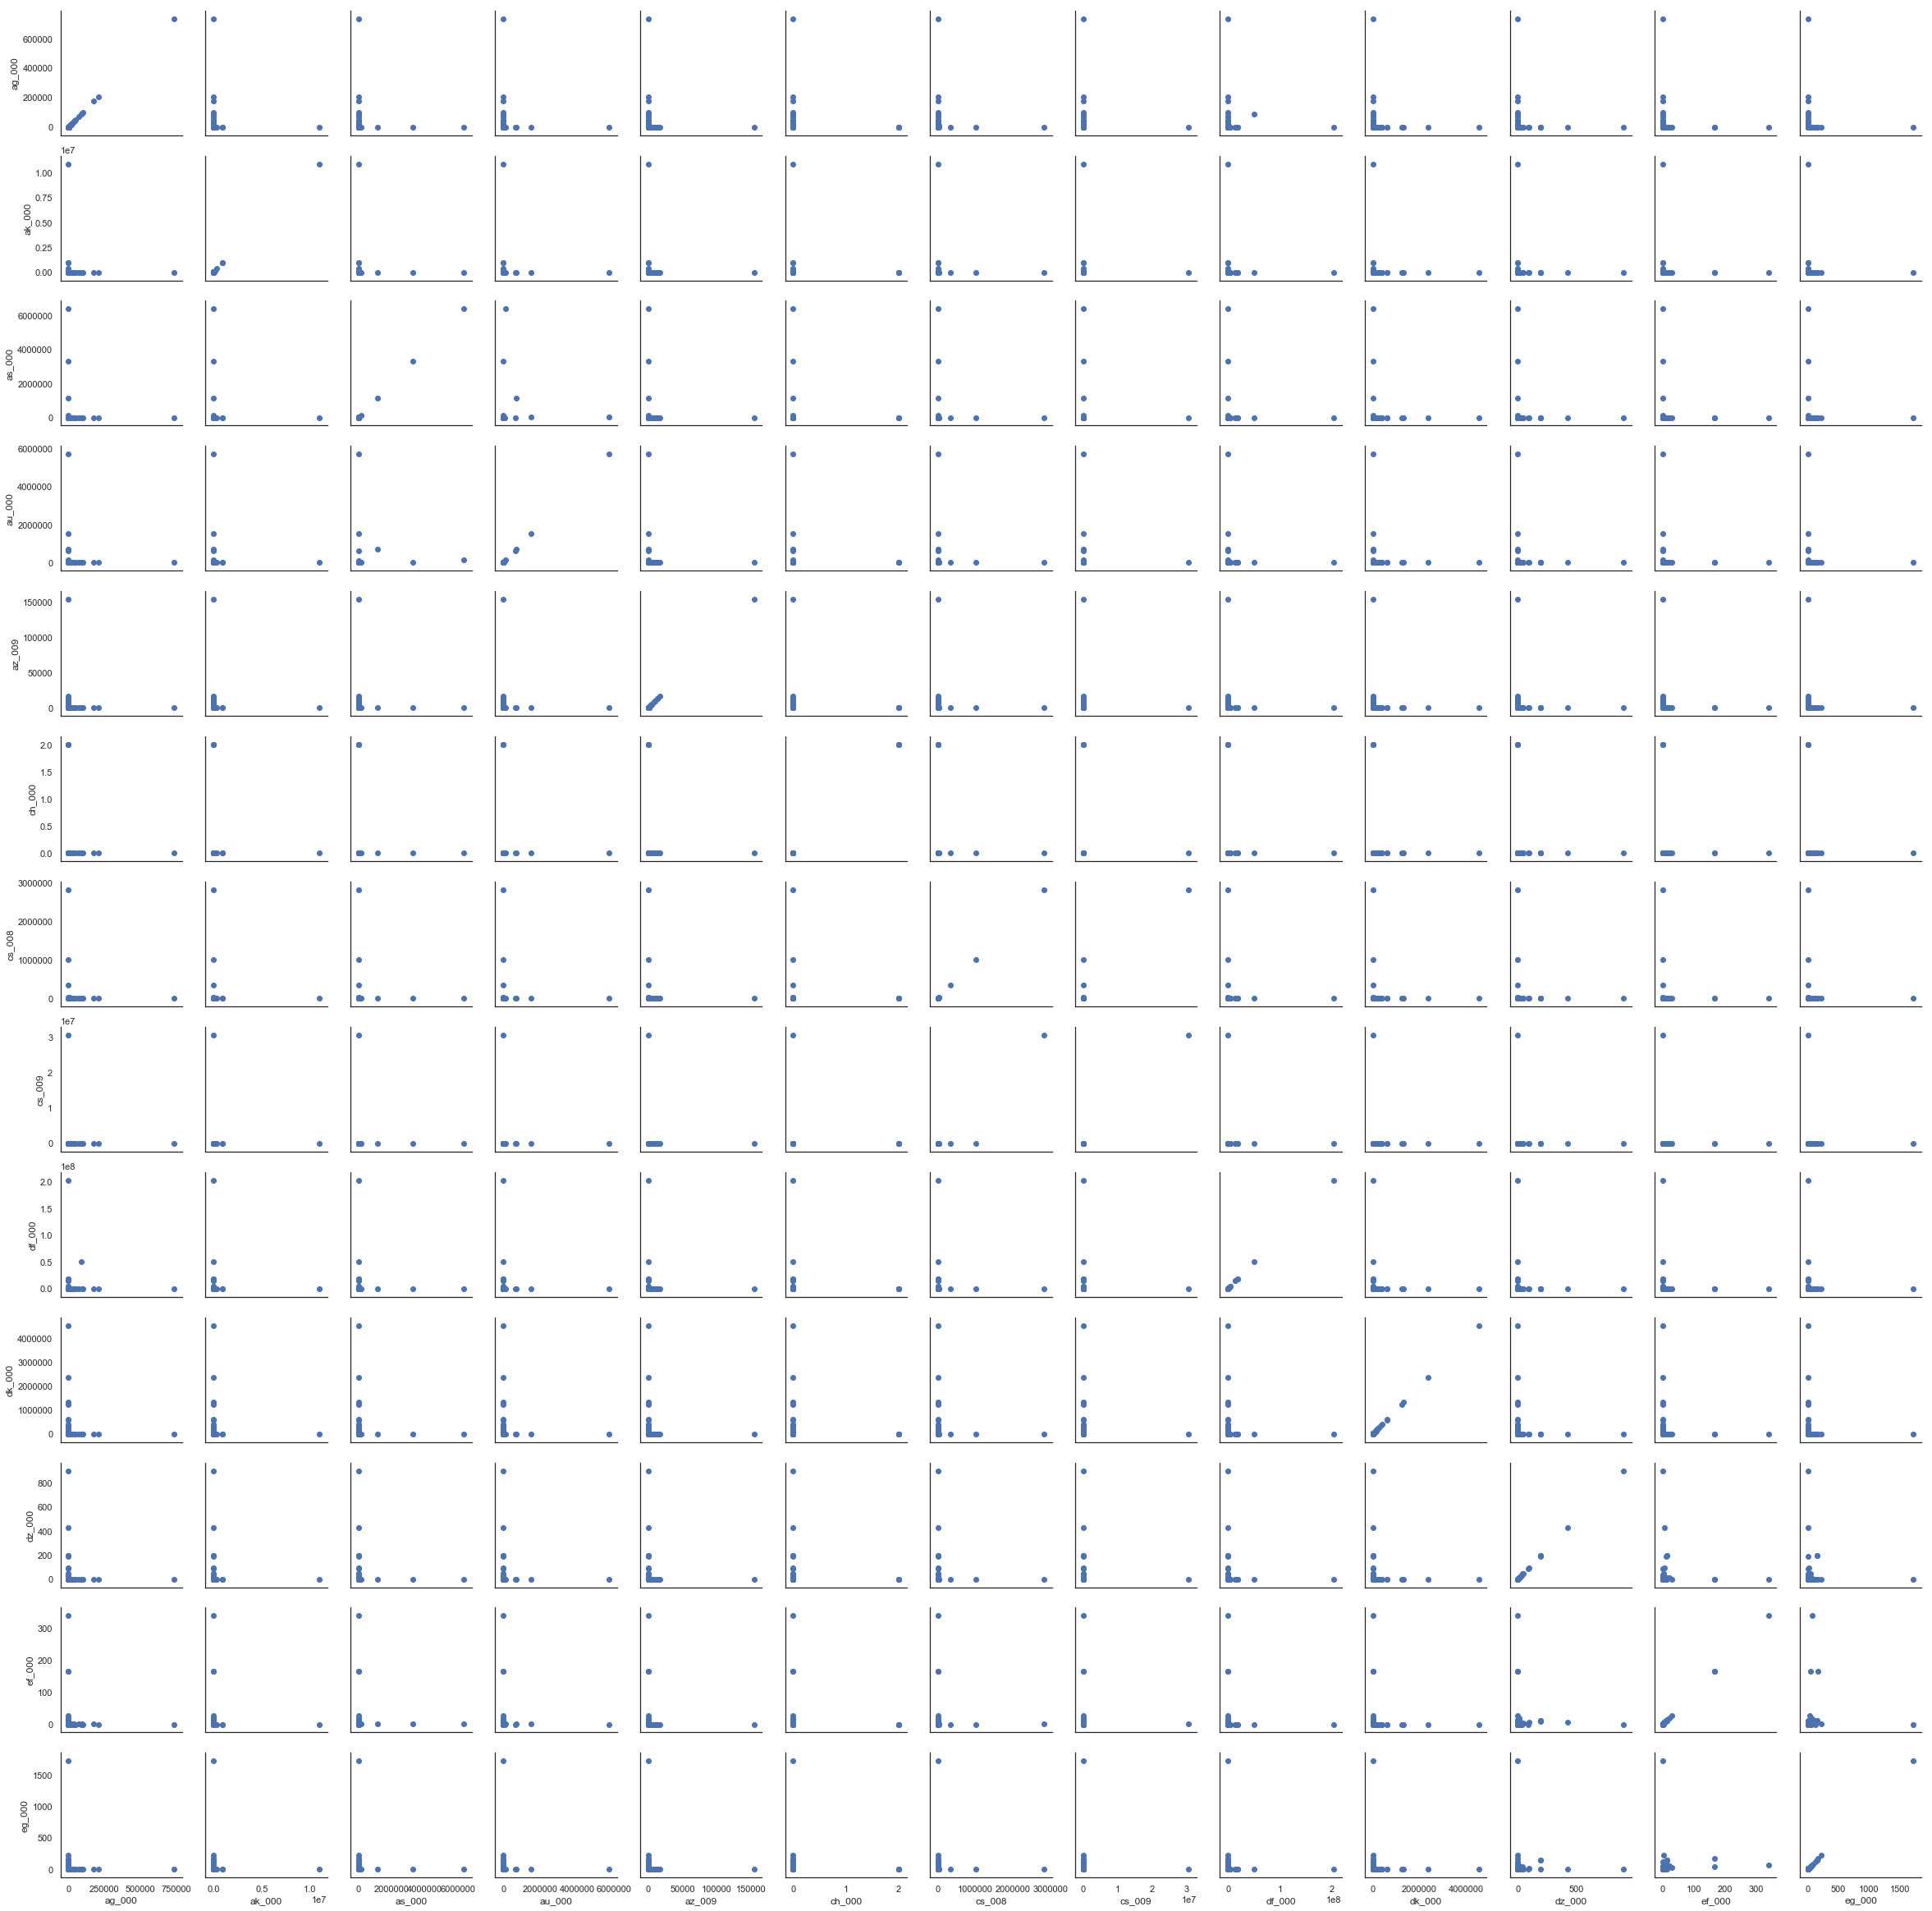

In [47]:
var3 = sns.PairGrid(test_data[yval])
var3 = var3.map(plt.scatter)

<br>__Plotting Boxplots for 13 items with highest CV in test set.__

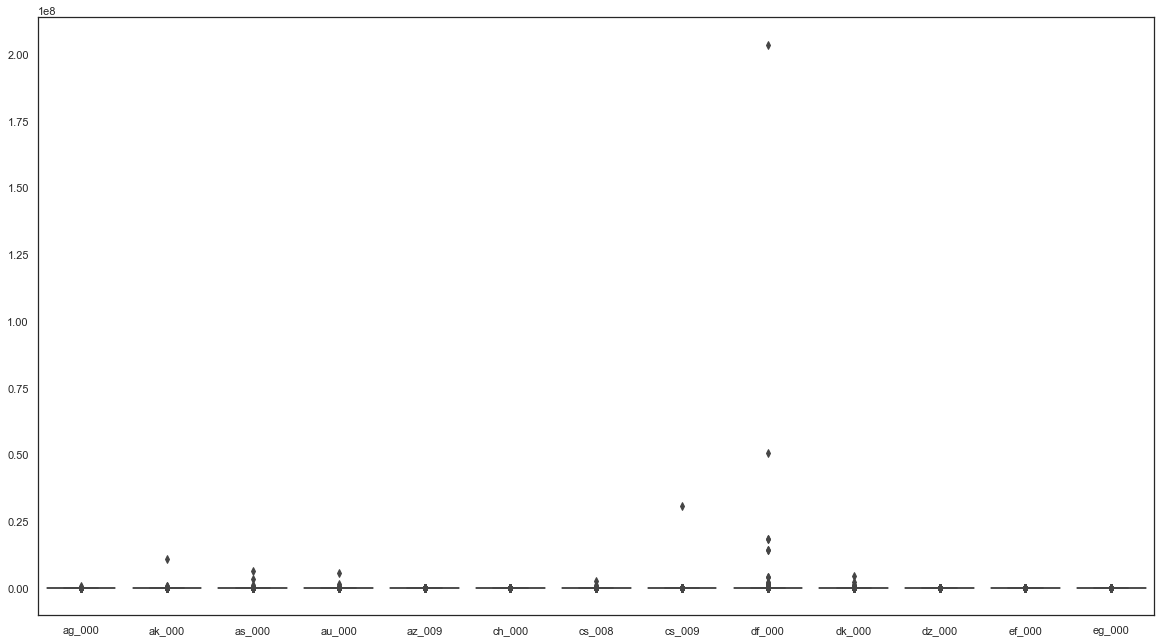

In [48]:
fig = plt.figure(figsize=(20, 11))
ax = fig.add_subplot(111)
x_data = test_data[yval]
sns.boxplot(data = x_data)
ax.set_xticklabels(yval)
plt.show()

<br><br>__(v) Number of positive and negative data.__

In [49]:
print("Total number of positive & negative values in Training set:")
pd.value_counts(training_data['class'].values, sort=False)

Total number of positive & negative values in Training set:


pos     1000
neg    59000
dtype: int64

In [50]:
print("Total number of positive & negative values in Test set: ")
pd.value_counts(test_data['class'].values, sort=False)

Total number of positive & negative values in Test set: 


neg    15625
pos      375
dtype: int64

<br>__(c)Train a random forest to classify the data set.__

In [51]:
X_train = training_data.iloc[:,1:171]
X_test = test_data.iloc[:,1:171]
y_train = training_data.iloc[:,0]
y_test = test_data.iloc[:,0]

In [52]:
clf=RandomForestClassifier(n_estimators=100, oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

__Misclassifcation rate__

In [53]:
clf_accuracy = accuracy_score(y_test, y_pred)
print("Misclassification Rate: ",(1-clf_accuracy)*100)

Misclassification Rate:  0.7874999999999965


__Confusion matrix__

In [54]:
confusion_matrix(y_test, y_pred)

array([[15607,    18],
       [  108,   267]], dtype=int64)

__ROC curve__

In [55]:
#Converting the y_test & y_pred to binary for ROC curve (with values negative = 0, positive = 1)
y_test_binary = y_test.replace({'neg': 0, 'pos': 1})
y_pred_binary = y_pred
y_pred_binary[y_pred_binary=='neg'] = 0
y_pred_binary[y_pred_binary=='pos'] = 1

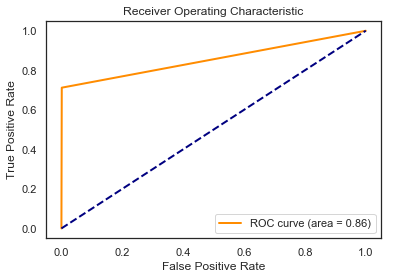

In [56]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc =  auc(fpr,tpr)
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

__AUC score__

In [57]:
print("AUC: ",roc_auc)

AUC:  0.855424


__Out of Bag error & Test error__

In [58]:
print("Out of bag error :", clf.oob_score_)
print("Test error: ", mean_squared_error(y_test_binary, y_pred_binary))

Out of bag error : 0.994
Test error:  0.007875


__Comparing the above Out of bag error to Test error, we can see that Test error is very low compared to Out of Bag error.__

<br>__(d) Random Forests by addressing class imbalance__

In [59]:
clf1=RandomForestClassifier(n_estimators=100, oob_score=True,class_weight="balanced")
clf1.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)

__Misclassifcation rate__

In [60]:
clf_accuracy1 = accuracy_score(y_test, y_pred1)
print("Misclassification Rate: ",(1-clf_accuracy1)*100)

Misclassification Rate:  1.1125000000000052


__Confusion matrix__

In [61]:
confusion_matrix(y_test, y_pred1)

array([[15610,    15],
       [  163,   212]], dtype=int64)

__ROC curve__

In [62]:
#Converting the y_test & y_pred to binary for ROC curve (with values negative = 0, positive = 1)
y_test_binary1 = y_test.replace({'neg': 0, 'pos': 1})
y_pred_binary1 = y_pred1
y_pred_binary1[y_pred_binary1=='neg'] = 0
y_pred_binary1[y_pred_binary1=='pos'] = 1

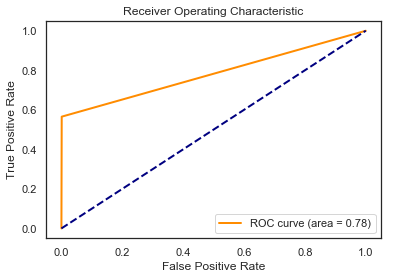

In [63]:
fpr, tpr, thresholds = roc_curve(y_test_binary1, y_pred_binary1)
roc_auc1 =  auc(fpr,tpr)
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

__AUC score__

In [64]:
print("AUC: ",roc_auc1)

AUC:  0.7821866666666667


__Out of Bag error & Test error__

In [65]:
print("Out of bag error :", clf1.oob_score_)
print("Test error: ", mean_squared_error(y_test_binary1, y_pred_binary1))

Out of bag error : 0.9921333333333333
Test error:  0.011125


__Comparing the above Out of bag error to Test error, we can see that Test error is very low compared to Out of Bag error.__

__Comparing the balanced Random forest to the imbalanced Randon forest, we can see that the Misclassification rate & Test error has increased for the balanced class when compared to the imbalanced class__

<br><br>__(e) Model Trees__

In [66]:
#preparing the dataset for weka
training_data.to_csv('Training_weka.csv', columns=training_data.columns)
test_data.to_csv('Test_weka.csv', columns = test_data.columns)

__Performed in Weka application__

<br><br>__(f) SMOTE to deal with class imbalance__

In [67]:
#preparing the dataset for weka
#Oversampling minority class using SMOTE.
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
training_SMOTE = pd.DataFrame(X_train_res, columns=X_train.columns)
training_SMOTE.insert(170,"class",y_train_res)
training_SMOTE.to_csv('Training_SMOTE.csv', columns=training_SMOTE.columns)

__Performed in Weka application__